itr: 0
itr: 1
itr: 2
itr: 3
itr: 4
itr: 5
itr: 6
itr: 7
itr: 8
itr: 9


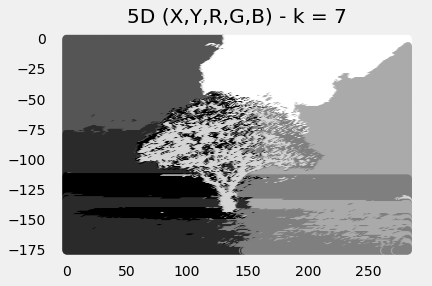

In [37]:
# import libs
import numpy as np
import pandas as pd
import random
import cv2
import matplotlib.pyplot as plt
import math

# pyplot configurations
plt.style.use('fivethirtyeight')
plt.rcParams["axes.grid"] = False

########## define initial data ##########

# the image used for both color and grayscale tests
image = cv2.imread('./images/tree.jpg') 

# colored image (3D)
X_3D_color = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
X_3D_color = X_3D_color.reshape((image.shape[0]*image.shape[1], image.shape[2]))

# gray image - requires a bit more work (still 3D)
# changed to grayscale using the weighted average method
X_3D_gray = []
for i in range(len(X_3D_color)):
    gray_value = math.floor(
        0.3*X_3D_color[i][0] + 
        0.59*X_3D_color[i][1] + 
        0.11*X_3D_color[i][2])
    X_3D_gray.append([gray_value, gray_value, gray_value])
X_3D_gray = np.array(X_3D_gray)

# 1D is pixel coordinate information
# whether or not the image is rgb or grayscale does not matter
X_1D = []
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        X_1D.append([i, j])
X_1D = np.array(X_1D)

# 5D for both color and gray - (x,y,r,g,b)
X_5D_color = []
X_5D_gray = []

for i in range(len(X_1D)):
    X_5D_color.append([
        X_1D[i][0], 
        X_1D[i][1], 
        X_3D_color[i][0], 
        X_3D_color[i][1], 
        X_3D_color[i][2]])
    
    X_5D_gray.append([
        X_1D[i][0], 
        X_1D[i][1], 
        X_3D_gray[i][0], 
        X_3D_gray[i][1], 
        X_3D_gray[i][2]])

X_5D_color, X_5D_gray = np.array(X_5D_color), np.array(X_5D_gray)

########## helper functions for kmeans ##########

# function to calculate euclidean distance
def euc_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

# assign each datapoint to a cluster based on current centroids
def nearest_centroid(centroids, X):
    assigned_centroids = []

    # for each value in the input data, calculate the euclidean distance
    # between it and each of the centroids, and take the smallest distance
    for x in X:
        distances = []
        for c in centroids:
            distances.append(euc_distance(x, c))
        assigned_centroids.append(np.argmin(distances))
    return assigned_centroids
    
# update the centroids
def update_centroids(clusters, X):
    new_centroids = []
    data = pd.concat(
        [pd.DataFrame(X), pd.DataFrame(clusters, columns=['cluster'])],
        axis=1
    )
    for c in set(data['cluster']):
        cluster = data[data['cluster'] == c][data.columns[:-1]]
        mean = cluster.mean(axis=0)
        new_centroids.append(mean)
    return new_centroids

########## class for running kmeans ##########

class k_means():
    def __init__(self, k, epochs):
        self.k = k
        self.epochs = epochs

    def fit(self, X, flag):
        # initialize random centroids & clusters
        init_centroids = random.sample(range(0, len(X)), self.k)
        clusters = nearest_centroid(init_centroids, X)

        centroids = []
        for i in init_centroids:
            centroids.append(X[i])
        centroids = np.array(centroids)

        X = np.array(X)
        X_recovered = X.copy() # to plot the image after kmeans took place

        for i in range(self.epochs):
            print('itr:', i)
            clusters = nearest_centroid(centroids, X)
            centroids = update_centroids(clusters, X)

        if (flag == 1): # for 1D (X,Y)
            plt.scatter(X_1D[:,1], -1*X_1D[:,0], s=50, c=clusters)
            plt.title('1D data - k = ' + str(self.k))
            plt.show()
        elif (flag == 3): # for 3D (R,G,B)
            plt.scatter(X_1D[:, 1], -1*X_1D[:, 0], s=50, c=clusters, cmap='binary')
            plt.title('3D Data - k = ' + str(self.k))
            plt.show()
        elif (flag == 5): # for 5D (X,Y,R,G,B)
            plt.scatter(X_1D[:, 1], -1*X_1D[:, 0], s=50, c=clusters, cmap='binary')
            plt.title('5D (X,Y,R,G,B) - k = ' + str(self.k))
            plt.show()

########## calling kmeans ##########

# iterations kept very low as this process would take 
# extremely long otherwise
# this will obviously yield less accurate results
model = k_means(k=7, epochs=10) 
model.fit(X_5D_gray, flag=5) # pass 1 for 1D data, 3 for 3D, 5 for 5D